In [9]:
import cvxpy as cp
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# specify problem data
n = 50
l = 10
m = 5
a = np.array([[1.25, 1.25]])
b = np.array([[l, l]])
d = 2
p = np.array([[2, 4.5, 6, 7, 8.5], [2.2, 5, 8, 6, 9]]).T
r = np.array([1, 0.8, 0.4, 1.4, 0.5])

In [11]:
# formulate the problem
x = cp.Variable((d, n + 1), name="x")
L = cp.Variable(name="L")
constr = [x[:, 0] == a, x[:, n] == b]
constr += [cp.sum(cp.square(x[:, 1:] - x[:, :-1]), axis=0) <= (L / n) ** 2]
for i in range(n + 1):
    constr += [cp.sum(cp.square(x[:, i] - p), axis=1) >= r ** 2]

# initialize to straight line path
x.value = (b.T - a.T) / n * np.arange(n + 1) + a.T
prob = cp.Problem(cp.Minimize(L), constr)
prob.solve(solver=cp.IPOPT, nlp=True, verbose=True, derivative_test='none')

(CVXPY) Nov 12 09:40:59 AM: Your problem has 103 variables, 309 constraints, and 0 parameters.
(CVXPY) Nov 12 09:40:59 AM: It is compliant with the following grammars: 
(CVXPY) Nov 12 09:40:59 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 12 09:40:59 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Nov 12 09:40:59 AM: Your problem is compiled with the CPP canonicalization backend.


                                     CVXPY                                     
                             v1.7.0.dev0+0.5870139                             

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.11.9, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     1328
Number of nonzeros in inequality constraint Jacobian.:      660
Number of nonzeros in Lagrangian Hessian.............:      612

Total number of variables............................:      715
                     variables with only lower bound

13.13688231933762

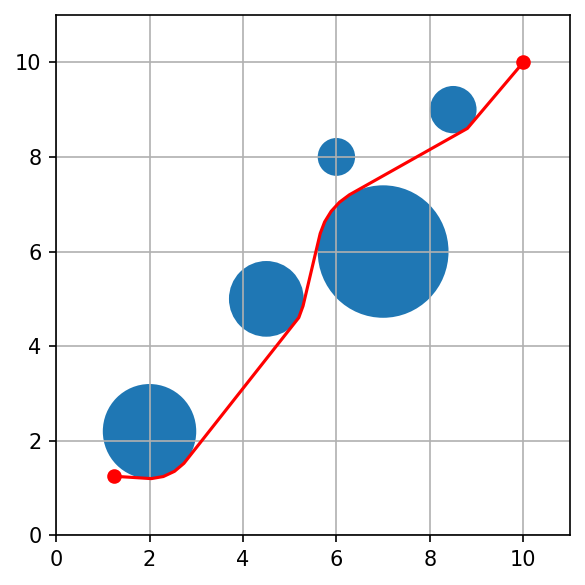

In [12]:
# visualization
fig, ax = plt.subplots(figsize=(4, 4))
for i in range(m):
    center = tuple(p[i, :])
    circle = mpatches.Circle(center, r[i], ec="none")
    ax.add_patch(circle)

plt.plot(a[0, 0], a[0, 1], "ro", markersize=6)
plt.plot(b[0, 0], b[0, 1], "ro", markersize=6)
ax1 = x.value[0, :]
ax2 = x.value[1, :]
plt.plot(ax1, ax2, "r-")
plt.ylim(0, 11)
plt.xlim(0, 11)
ax.grid()
fig.set_dpi(150)
fig.tight_layout()
plt.savefig("path_planning.pdf")